<a href="https://colab.research.google.com/github/aschelin/Dengue/blob/master/correlacao_inmet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Carregando os dados:

In [144]:

data_path = "https://raw.githubusercontent.com/aschelin/Dengue/master/dadosinmettotV2.csv"

In [153]:
df = pd.read_csv(data_path,sep=';',decimal=",")

In [154]:
df

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO (AUT)(mm)",PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB),TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C),"TEMPERATURA MAXIMA, DIARIA (AUT)(°C)","TEMPERATURA MEDIA, DIARIA (AUT)(°C)","TEMPERATURA MINIMA, DIARIA (AUT)(°C)","UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)","UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)","VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)","VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)"
0,07/01/2014,0.0,886.204167,14.312500,28.9,22.816667,16.6,61.416667,34.0,9.6,2.341667
1,08/01/2014,0.0,886.141667,12.508333,28.2,23.004167,15.8,53.500000,29.0,9.2,2.904167
2,09/01/2014,0.0,885.516667,12.625000,28.5,23.395833,17.5,53.125000,28.0,8.6,2.862500
3,10/01/2014,0.0,885.720833,14.158333,28.1,23.345833,17.1,57.125000,40.0,9.7,3.016667
4,11/01/2014,0.0,887.012500,14.754167,29.0,21.795833,16.1,65.916667,32.0,9.3,2.345833
...,...,...,...,...,...,...,...,...,...,...,...
2179,26/12/2019,0.0,887.166667,17.591667,28.6,22.800000,18.7,74.125000,48.0,7.6,1.637500
2180,27/12/2019,0.0,886.966667,17.037500,28.5,23.754167,19.6,67.708333,43.0,9.7,2.945833
2181,28/12/2019,0.2,886.395833,15.387500,29.0,23.879167,19.3,60.458333,32.0,8.9,3.037500
2182,29/12/2019,0.0,885.379167,15.187500,29.8,24.170833,18.4,59.541667,34.0,7.8,2.491667


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Data Medicao                                            2184 non-null   object 
 1   PRECIPITACAO TOTAL, DIARIO (AUT)(mm)                    2183 non-null   float64
 2   PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)              2179 non-null   float64
 3   TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)  2179 non-null   float64
 4   TEMPERATURA MAXIMA, DIARIA (AUT)(°C)                    2183 non-null   float64
 5   TEMPERATURA MEDIA, DIARIA (AUT)(°C)                     2178 non-null   float64
 6   TEMPERATURA MINIMA, DIARIA (AUT)(°C)                    2183 non-null   float64
 7   UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)           2182 non-null   float64
 8   UMIDADE RELATIVA DO AR, MINIMA DIARIA 

In [156]:
df['Data Medicao']=pd.to_datetime(df['Data Medicao'])

In [157]:

df.set_index('Data Medicao',inplace=True)

In [158]:
df.rename(columns={'PRECIPITACAO TOTAL, DIARIO (AUT)(mm)':'rain'},inplace=True)
df.rename(columns={'PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)':'pressure'},inplace=True)
df.rename(columns={'TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)':'torvalho'},inplace=True)
df.rename(columns={'TEMPERATURA MAXIMA, DIARIA (AUT)(°C)':'tmax'},inplace=True)
df.rename(columns={'TEMPERATURA MEDIA, DIARIA (AUT)(°C)':'tmed'},inplace=True)
df.rename(columns={'TEMPERATURA MINIMA, DIARIA (AUT)(°C)':'tmin'},inplace=True)
df.rename(columns={'UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)':'umidaderelmed'},inplace=True)
df.rename(columns={'VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)':'ventorajmax'},inplace=True)
df.rename(columns={'UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)':'umidaderelmin'},inplace=True)
df.rename(columns={'VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)':'ventovelmed'},inplace=True)


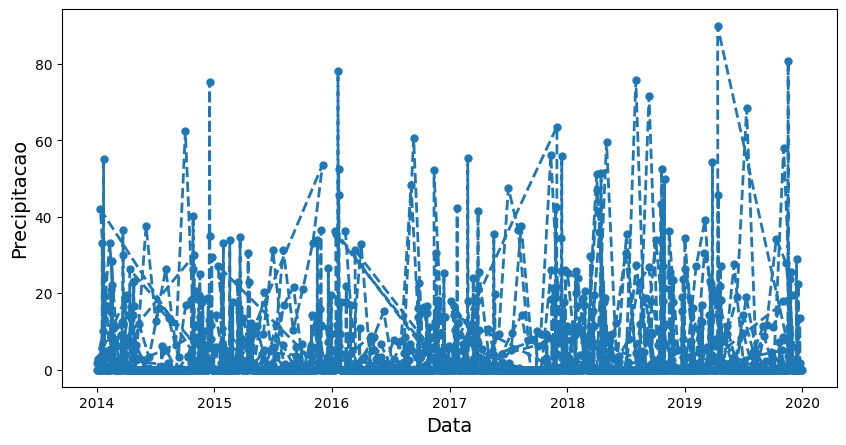

In [159]:

fig, (ax1) = plt.subplots(1,figsize=(10,5),dpi=100)

ax1.plot(df['rain'],marker='o', linestyle='--',    linewidth=2,markersize=5, color='tab:blue')
#maxi=round(df.Total.max()+100);
ax1.set_ylabel('Precipitacao',fontsize=14);
ax1.set_xlabel('Data',fontsize=14);

In [161]:
dfcorr = df.corr()

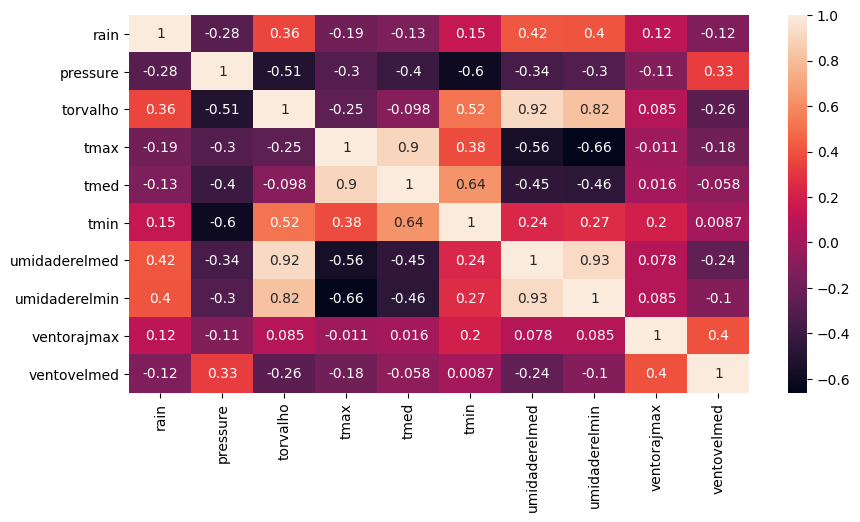

In [167]:
fig, (ax2) = plt.subplots(1,figsize=(10,5),dpi=100)
sns.heatmap(dfcorr,annot=True)

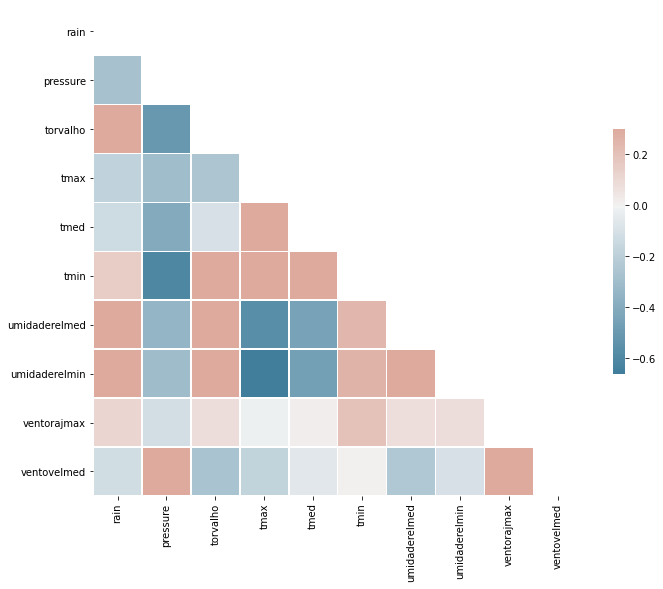

In [168]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(dfcorr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dfcorr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});